### Usage Time: Measurement of function operation time

An important criterion for evaluating algorithms is their operating time.
To estimate the running time of the function, you can use the decorator given here.

In [1]:
# %load usage_time.py
#!/usr/bin/env python

"""Usage Time

Project: TryPython
A collection of educational materials for learning the Python

Author: Alexander Krasnikov aka askras
Website: trypython.pro

License: BSD 3 clause
"""

import functools
import timeit
import typing


def get_usage_time(number: int = 1,
                   setup: str = "pass",
                   ndigits: int = 3) -> typing.Callable:
    """Decorator for measuring the speed of the function (in seconds)

    Parameters
    ----------
    number : int, default=1
        Number of code repetitions.
    setup : str, default="pass"
        Code executed once before timing.
    ndigits : int, default=3
        Number of decimal places in the returned value.

    Returns
    -------
    decorator: typing.Callable
        Decorator for measuring the time of the function in seconds.

    See Also
    --------
    timeit
        Measure execution time of small code snippets.

    References
    ----------
    [1] timeit documentation : https://docs.python.org/3/library/timeit.html

    Examples
    --------
    Decorating an existing function:

    >>> import time
    >>> def sleep_func(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> get_usage_time_sleep_func = get_usage_time()(sleep_func)
    >>> time_sleep_func = get_usage_time_sleep_func(2)
    >>> print(f"The function was executed for {time_sleep_func} seconds")
    The function was executed for 2.0 seconds
    >>> get_usage_time(number=5)(sleep_func)(4)
    4.0

    Measuring the running time of a function for different parameter values:

    >>> import time
    >>> def sleep_func(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> for n in range(1,4):
    ...    get_usage_time_sleep_func = get_usage_time(number=2)(sleep_func)
    ...    print(get_usage_time_sleep_func(n))
    1.0
    2.0
    3.0

    Using the `setup` option:

    >>> import time
    >>> def sleep_func(n):
    ...     time.sleep(n)
    ...     return n
    ...
    >>> setup = "print('Start setup'); time.sleep(10); print('End setup')"
    >>> get_usage_time_sleep_func = get_usage_time(setup=setup)(sleep_func)
    >>> print(get_usage_time_sleep_func(3))
    Start setup
    End setup
    3.0

    Decoding the generated function:

    >>> import time
    >>> @get_usage_time(number=2, setup="print('Start');", ndigits=0)
    ... def sleep_func(n):
    ...    time.sleep(n)
    ...    return n
    ...
    >>> time_sleep_func = sleep_func(3)
    Start
    >>> print(time_sleep_func)
    3.0
    """

    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)
        return wrapper
    return decorator


if __name__ == "__main__":
    import time

    def sleep_func(n):
        time.sleep(n)
        return n

    for i in range(1, 4):
        time_sleep_func = get_usage_time(number=3)(sleep_func)
        print(time_sleep_func(i))


1.0
2.0
3.0


#### Usage example

In [2]:
import random

def my_func(n):
    L = [random.randint(1, 1000) for _ in range(n)]
    return sorted(L)

In [3]:
# WARNING. It may take a few minutes.
func = get_usage_time(ndigits=5)(my_func)
for i in range(1, 9): # Replace 9 with a smaller number to speed up
    print(f"The function was executed for {func(10**i)} seconds at n=10^{i}.")

The function was executed for 3e-05 seconds at n=10^1.
The function was executed for 7e-05 seconds at n=10^2.
The function was executed for 0.00076 seconds at n=10^3.
The function was executed for 0.00778 seconds at n=10^4.
The function was executed for 0.06603 seconds at n=10^5.
The function was executed for 0.66859 seconds at n=10^6.
The function was executed for 7.04781 seconds at n=10^7.
The function was executed for 65.38069 seconds at n=10^8.


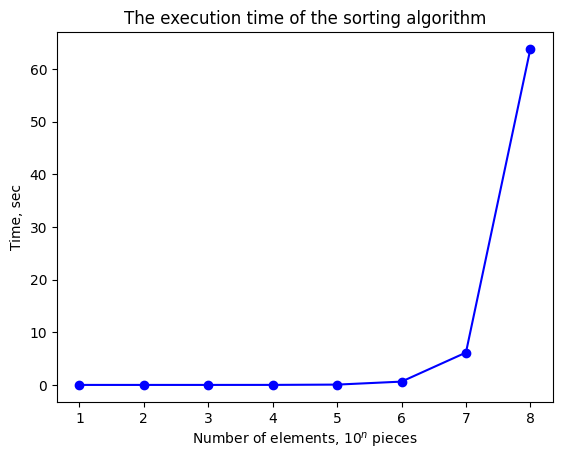

In [4]:
# WARNING. It may take a few minutes.

import matplotlib.pyplot as plt
%matplotlib inline

func = get_usage_time(ndigits=5)(my_func)

items = range(1, 9) # Replace 9 with a smaller number to speed up
times = [func(10**i) for i in items]

fig = plt.plot(items, times, "bo-") 
plt.title("The execution time of the sorting algorithm")
ax = plt.gca()
ax.set_xlabel("Number of elements, $10^n$ pieces")
ax.set_ylabel("Time, sec")
plt.show()

#### Program research
Try to find answers to the following questions.
Experiment with code changes and run the program again to see how they will affect its operation.

1. Modify the decorator to get the time value in milliseconds (microseconds).

#### Ссылки

1. timeit documentation : https://docs.python.org/3/library/timeit.html